# Les choanoflagellés

## Préparation du jeu de données

On souhaite ne garder que les échantillons de taille >3 µm.
Importer le jeu de données : 

In [1]:
data <- read.delim("Input/astan-18sv4_dada2_v1.0.filtered.table.with.taxo.lulu.tsv.gz.tsv")

On enlève les échantillons de moins de 3 µm et les ASV non identifiés comme eucaryotes : 

In [5]:
library (dplyr)

data2 <- data[, -grep("02$", names(data))]
data3 <- data2[grep("^Root;Eukaryota", data2$taxonomy), ]

non_date_columns <- data3[, 1:6]
date_columns <- data3[, 7:ncol(data3)]
(date_part <- sub("^RA(\\d{6})\\.3$", "\\1", names(date_columns)))
(dates <- as.Date(paste0("20", date_part), format = "%Y%m%d"))
(sorted_indices <- order(dates, na.last = TRUE))
(date_columns <- date_columns[, sorted_indices])
colnames(date_columns) <- format(dates[sorted_indices], "%Y-%m-%d")
data4 <- cbind(non_date_columns, date_columns)

[1] "140605" "150227" "140423" "140522" "140620" "140721" "140819" "140904"
  [9] "141002" "141016" "141031" "141114" "141201" "150114" "150128" "150212"
 [17] "150313" "150413" "160104" "160118" "160202" "090107" "090120" "090205"
 [25] "090218" "090306" "090320" "090403" "090416" "090504" "090518" "090602"
 [33] "090616" "090701" "090716" "090731" "090814" "090828" "090914" "090928"
 [41] "091012" "091027" "091110" "091126" "091210" "091223" "100111" "100125"
 [49] "100208" "100219" "100309" "100324" "100407" "100422" "100506" "100521"
 [57] "100607" "100621" "100706" "100720" "100805" "100819" "100903" "100916"
 [65] "101001" "101015" "101029" "101129" "101215" "110113" "110128" "110211"
 [73] "110225" "110314" "110328" "110412" "110426" "110511" "110525" "110624"
 [81] "110711" "110725" "110808" "110823" "110921" "111004" "111020" "111102"
 [89] "111118" "111205" "111219" "120104" "120118" "120201" "120216" "120305"
 [97] "120316" "120402" "120430" "120514" "120529" "120613" "120628" "120712"
[105] "120727" "120810" "120827" "120910" "121009" "121022" "121107" "121122"
[113] "121206" "121221" "130107" "130121" "130204" "130219" "130306" "130321"
[121] "130403" "130503" "130516" "130603" "130617" "130702" "130717" "130731"
[129] "130814" "130829" "130913" "130926" "131014" "131030" "131112" "131126"
[137] "131211" "131223" "140110" "140124" "140210" "140224" "140310" "140325"
[145] "140408" "140507" "140707" "140918" "150327" "150427" "150512" "150526"
[153] "150609" "150624" "150710" "150724" "150824" "150907" "150921" "151006"
[161] "151021" "151104" "151120" "151204" "151217" "160217" "160304" "160317"
[169] "160401" "160415" "160429" "160513" "160530" "160614" "160628" "160713"
[177] "160728" "160812" "160826" "160909" "160923" "161010" "161024" "161108"
[185] "161122" "161207" "161222"

[1] "2014-06-05" "2015-02-27" "2014-04-23" "2014-05-22" "2014-06-20"
  [6] "2014-07-21" "2014-08-19" "2014-09-04" "2014-10-02" "2014-10-16"
 [11] "2014-10-31" "2014-11-14" "2014-12-01" "2015-01-14" "2015-01-28"
 [16] "2015-02-12" "2015-03-13" "2015-04-13" "2016-01-04" "2016-01-18"
 [21] "2016-02-02" "2009-01-07" "2009-01-20" "2009-02-05" "2009-02-18"
 [26] "2009-03-06" "2009-03-20" "2009-04-03" "2009-04-16" "2009-05-04"
 [31] "2009-05-18" "2009-06-02" "2009-06-16" "2009-07-01" "2009-07-16"
 [36] "2009-07-31" "2009-08-14" "2009-08-28" "2009-09-14" "2009-09-28"
 [41] "2009-10-12" "2009-10-27" "2009-11-10" "2009-11-26" "2009-12-10"
 [46] "2009-12-23" "2010-01-11" "2010-01-25" "2010-02-08" "2010-02-19"
 [51] "2010-03-09" "2010-03-24" "2010-04-07" "2010-04-22" "2010-05-06"
 [56] "2010-05-21" "2010-06-07" "2010-06-21" "2010-07-06" "2010-07-20"
 [61] "2010-08-05" "2010-08-19" "2010-09-03" "2010-09-16" "2010-10-01"
 [66] "2010-10-15" "2010-10-29" "2010-11-29" "2010-12-15" "2011-01-13"
 [71] "2011-01-28" "2011-02-11" "2011-02-25" "2011-03-14" "2011-03-28"
 [76] "2011-04-12" "2011-04-26" "2011-05-11" "2011-05-25" "2011-06-24"
 [81] "2011-07-11" "2011-07-25" "2011-08-08" "2011-08-23" "2011-09-21"
 [86] "2011-10-04" "2011-10-20" "2011-11-02" "2011-11-18" "2011-12-05"
 [91] "2011-12-19" "2012-01-04" "2012-01-18" "2012-02-01" "2012-02-16"
 [96] "2012-03-05" "2012-03-16" "2012-04-02" "2012-04-30" "2012-05-14"
[101] "2012-05-29" "2012-06-13" "2012-06-28" "2012-07-12" "2012-07-27"
[106] "2012-08-10" "2012-08-27" "2012-09-10" "2012-10-09" "2012-10-22"
[111] "2012-11-07" "2012-11-22" "2012-12-06" "2012-12-21" "2013-01-07"
[116] "2013-01-21" "2013-02-04" "2013-02-19" "2013-03-06" "2013-03-21"
[121] "2013-04-03" "2013-05-03" "2013-05-16" "2013-06-03" "2013-06-17"
[126] "2013-07-02" "2013-07-17" "2013-07-31" "2013-08-14" "2013-08-29"
[131] "2013-09-13" "2013-09-26" "2013-10-14" "2013-10-30" "2013-11-12"
[136] "2013-11-26" "2013-12-11" "2013-12-23" "2014-01-10" "2014-01-24"
[141] "2014-02-10" "2014-02-24" "2014-03-10" "2014-03-25" "2014-04-08"
[146] "2014-05-07" "2014-07-07" "2014-09-18" "2015-03-27" "2015-04-27"
[151] "2015-05-12" "2015-05-26" "2015-06-09" "2015-06-24" "2015-07-10"
[156] "2015-07-24" "2015-08-24" "2015-09-07" "2015-09-21" "2015-10-06"
[161] "2015-10-21" "2015-11-04" "2015-11-20" "2015-12-04" "2015-12-17"
[166] "2016-02-17" "2016-03-04" "2016-03-17" "2016-04-01" "2016-04-15"
[171] "2016-04-29" "2016-05-13" "2016-05-30" "2016-06-14" "2016-06-28"
[176] "2016-07-13" "2016-07-28" "2016-08-12" "2016-08-26" "2016-09-09"
[181] "2016-09-23" "2016-10-10" "2016-10-24" "2016-11-08" "2016-11-22"
[186] "2016-12-07" "2016-12-22"

[1]  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
 [19]  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
 [37]  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
 [55]  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
 [73]  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 [91] 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
[109] 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145   3 146
[127]   4   1   5 147   6   7   8 148   9  10  11  12  13  14  15  16   2  17
[145] 149  18 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
[163]  19  20  21 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187

,RA090107.3,RA090120.3,RA090205.3,RA090218.3,RA090306.3,RA090320.3,RA090403.3,RA090416.3,RA090504.3,RA090518.3,⋯,RA160812.3,RA160826.3,RA160909.3,RA160923.3,RA161010.3,RA161024.3,RA161108.3,RA161122.3,RA161207.3,RA161222.3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,506,643,775,755,591,459,420,568,1081,892,⋯,4342,11389,2433,6501,6840,8757,9679,4615,6060,3204
2,101,210,131,64,304,417,499,270,422,55,⋯,1579,4114,751,4342,2068,3088,3108,1805,736,1498
3,1405,1865,2731,1511,1078,2293,1338,2764,1270,3032,⋯,1925,15370,1226,5990,6838,4917,16254,8685,5287,5394
4,264,312,471,349,320,347,280,317,532,438,⋯,2205,6015,1742,3487,3898,2271,2664,1464,3267,2203
5,366,383,442,370,306,279,199,296,378,215,⋯,799,2999,908,1608,2838,2865,2215,1012,2097,1158
6,137,175,192,114,71,75,58,116,347,349,⋯,2167,3787,778,2339,3263,2436,4585,2504,3991,1610
7,468,214,2611,1769,1291,743,265,351,288,315,⋯,1847,8789,1116,592,19109,7079,25939,2423,4627,2461
8,719,272,790,505,430,124,0,0,29,0,⋯,196,730,229,312,1153,1021,372,10033,2124,5724
9,124,234,717,677,1781,1782,503,275,344,205,⋯,2004,3299,237,878,1727,686,996,272,531,303


Figure du nombre de reads par amplicon : 

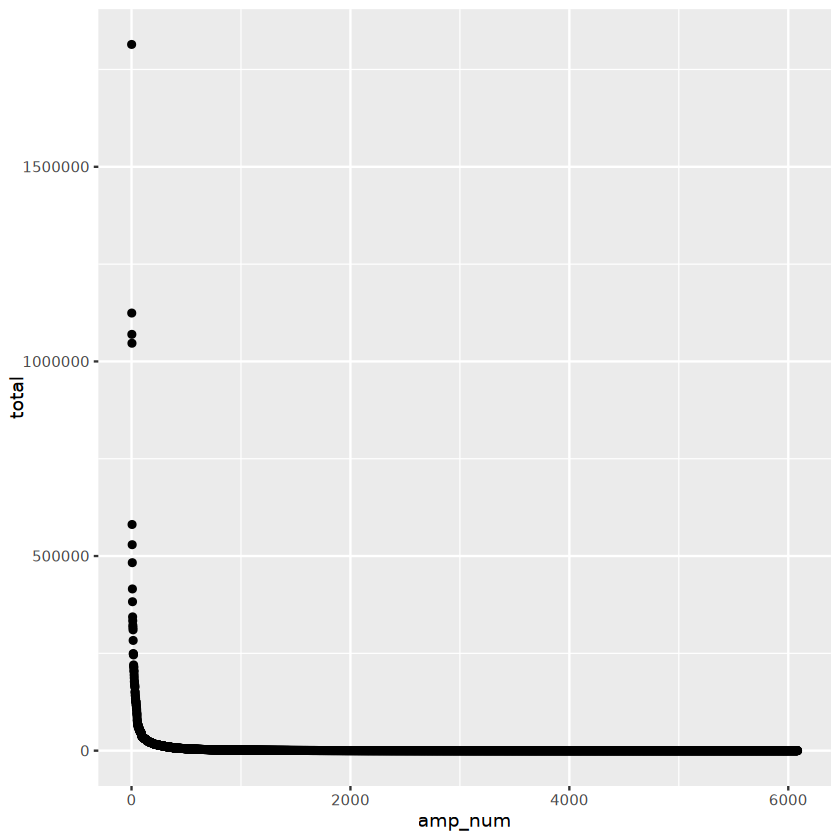

In [8]:
data4$amp_num <- seq(1,6085,1)
library(ggplot2)
ggplot(data4, aes(x = amp_num, y = total))+geom_point()

Figure du nombre de reads par séquence pour visualiser des données aberrantes :

Warning message in rbind(deparse.level, ...):
“number of columns of result, 190, is not a multiple of vector length 191 of arg 2”


,data2_filtered,sample
,<chr>,<chr>
2009-01-07,156049,2009-01-07
2009-01-20,23864,2009-01-20
2009-02-05,22996,2009-02-05
2009-02-18,37410,2009-02-18
2009-03-06,30285,2009-03-06
2009-03-20,34921,2009-03-20
2009-04-03,41285,2009-04-03
2009-04-16,34065,2009-04-16
2009-05-04,29486,2009-05-04


[1] "100299"

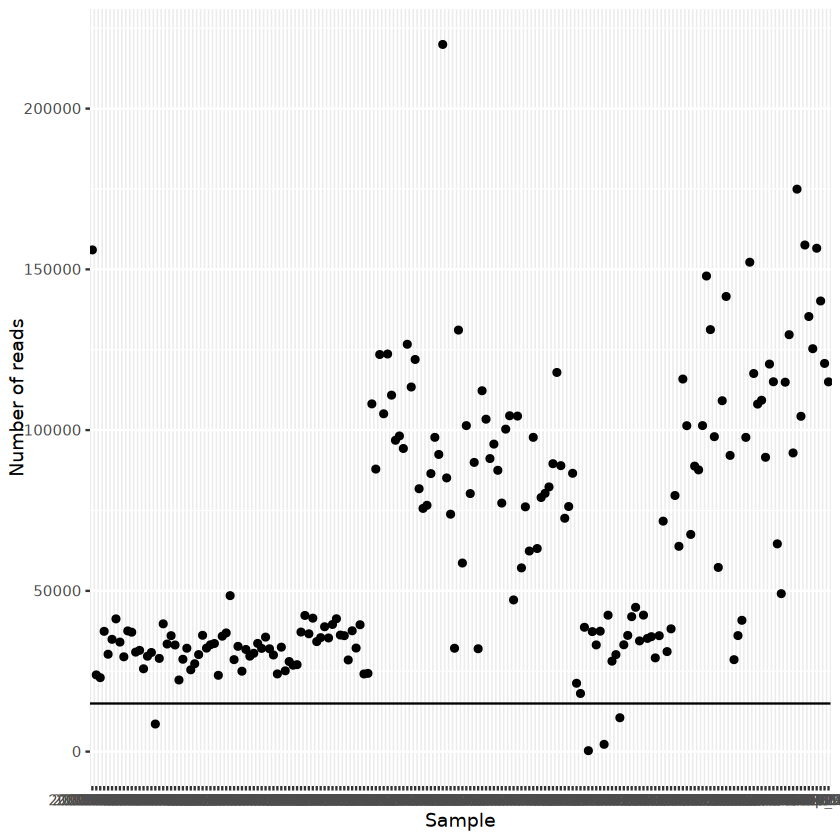

In [12]:

data2_numeric <- data4[, sapply(data4, is.numeric)] #ne garder que les valeurs numériques

somme <- colSums(data2_numeric[, sapply(data2_numeric, is.numeric)], na.rm = TRUE)
data2_numeric <- rbind(data2_numeric, c("Total", somme)) #ajouter une dernière ligne qui fait la somme des reads de tous les amplicons pour chaque échantillon

data2_filtered <- data2_numeric %>%
  filter(total == "Total") #ne garder que la ligne des sommes que l'on vient d'ajouter

data2_filtered <- t(data2_filtered) #basculer les lignes et colonnes
data2_filtered <- data2_filtered[3:190,] #enlever la ligne total et la ligne spread
data2_filtered <- as.data.frame(data2_filtered) #associer un nom de variable aux valeurs de nombre de reads par échantillon
data2_filtered$sample <- rownames(data2_filtered) #associer un nom de variable aux noms des échantillons
View(data2_filtered)
ggplot (data2_filtered, aes(x=as.factor(sample), y = as.numeric(data2_filtered)))+geom_point() + labs (x="Sample", y="Number of reads") + geom_hline(aes(yintercept=15000))

min(data2_filtered$data2_filtered)


On décide d'enlever les échantillons qui ont moins de 15 000 reads. 

In [ ]:
data3 <- data2_filtered %>% filter(>15,000)
View (data3)